<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>Меры качества кластеризации, уменьшение размерности признаков (практика)</center></h2>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

try:
    from ipywidgets import interact, IntSlider, fixed, FloatSlider
except ImportError:
    print u'Так надо'

# Качество алгоритмов кластеризации

#### Задание
Запустите метод k-средних для данных ниже, расчитайте меру качества ARI по отношению к истинному разбиению в переменной `y` и меру `silhouette`.

Все должно получится идеально (ну или почти)!

In [7]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_samples, silhouette_score

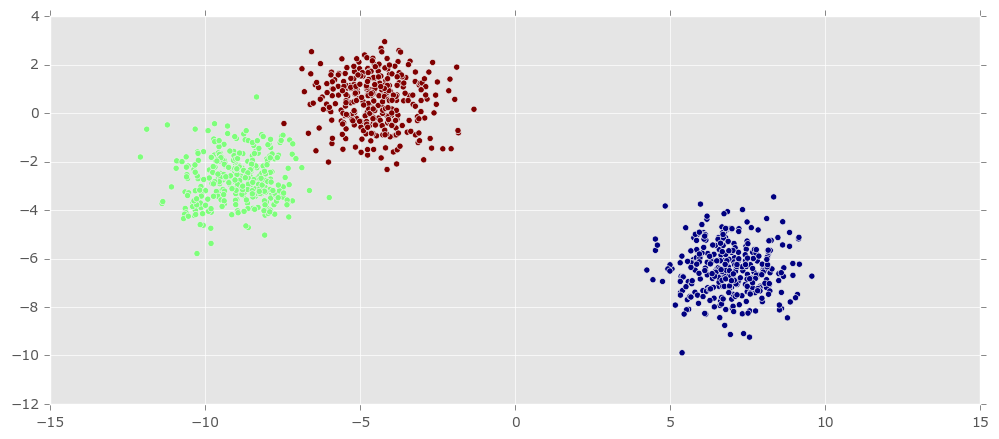

In [8]:
X, y = make_blobs(n_samples=1000, n_features=2,
                  centers=3, random_state=15)
plt.scatter(X[:,0], X[:,1], c=y)

#### Задание
Давайте чуть-чуть изменим данные.

Попробуем прокластеризовать их с помощью k-means и GMM (EM-алгоритма с гауссовскими распределениями).

Вновь оценим качество с сравнить ARI и `silhouette`.

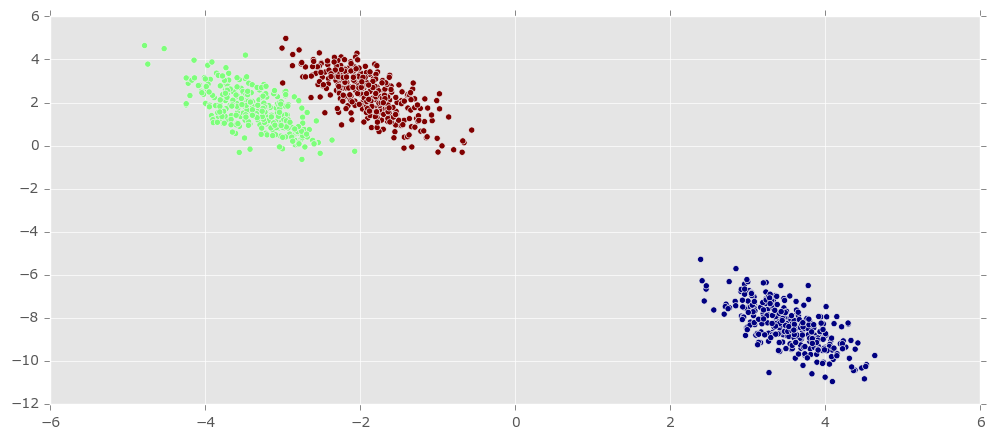

In [21]:
from sklearn.mixture import GaussianMixture
Trans = [[ 0.40834549, -0.43667341],
         [-0.10887718, 0.829]]
X_t = X.dot(Trans)
plt.scatter(X_t[:,0], X_t[:,1], c=y)

## Feature Selection

#### Recursive Feature Elimination

In [ ]:
def load_otp():
    # Just data load and some preprocessing
    features = pd.read_csv('data/descr.txt', sep='\t', encoding='cp1251', names=['feature', 'descr'])
    
    features = features.iloc[3:]
    feature_names = features.iloc[:, 0].values
    
    df_data_x = pd.read_csv('data/data_x.csv', sep=';', header=None, names=feature_names)
    df_data_x.loc[:, 'PREVIOUS_CARD_NUM_UTILIZED'] = df_data_x.PREVIOUS_CARD_NUM_UTILIZED.fillna(0)
    
    features.loc[:, 'uniq_vals'] = df_data_x.apply(lambda c: c.nunique(), axis=0).values
    
    features = features.reset_index(drop=True)
    
    df_data_y = pd.read_csv('data/data_y.csv', sep=';', names=['active'])
    
    idx = np.where(df_data_x.dtypes == 'object')[0]

    for i in idx:
        df_data_x.iloc[:, i] = df_data_x.iloc[:, i].str.replace(',', '.').astype('float')
        
    df_data = df_data_x.join(df_data_y)
    
    return df_data, features

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, Imputer

In [ ]:
df_data, features = load_otp()

In [ ]:
X = df_data.iloc[:, :-1].values
y = df_data.iloc[:, -1].values

In [ ]:
cv = StratifiedKFold(5, shuffle=True, random_state=123)

In [ ]:
pipeline = Pipeline([
    ('imputer', Imputer(strategy='median')),
    ('scaller', StandardScaler()),
    ('clf', RFECV(LogisticRegression(), 
                  verbose=2, cv=cv, scoring='roc_auc', n_jobs=1))
])


In [ ]:
pipeline.fit(X, y)

In [ ]:
rfe = pipeline.steps[-1][1]

In [ ]:
plt.plot(rfe.grid_scores_)

# Метод главных компонент

Lets try to use PCA on some dataset with various different ways

In [ ]:
# Load data
df_wine = pd.read_csv('data/winequality-red.csv', sep=';')

# Make classification target feature
df_wine.loc[:, 'quality_cat'] = (df_wine.quality > 5).astype(int)
df_wine = df_wine.drop('quality', axis=1)

# Get descriptive and target features
X = df_wine.iloc[:, :-1].values
y = df_wine.iloc[:, -1].values

## PCA через sklearn

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=5)

## PCA через ковариационную матрицу

In [ ]:
from numpy.linalg import eig

## Оценка качества при разных количества компонент

Реализуйте 2 пайплайнк:
    * StandartScaler + LogisticRegression
    * StandartScaler + PCA + LogisticRegression

Оцените качество пайплайна с PCA при разных количествах компонент и сравните его с первым

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score

# T-SNE

#### Задание
Выполните многомерное шкалирование данных с цифрами с помощью tsne.

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
## Your Code Here